In [1]:
%pip install scipy matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


dict_keys(['ans'])
Variables in the .mat file:
- ans: shape (5, 6013)


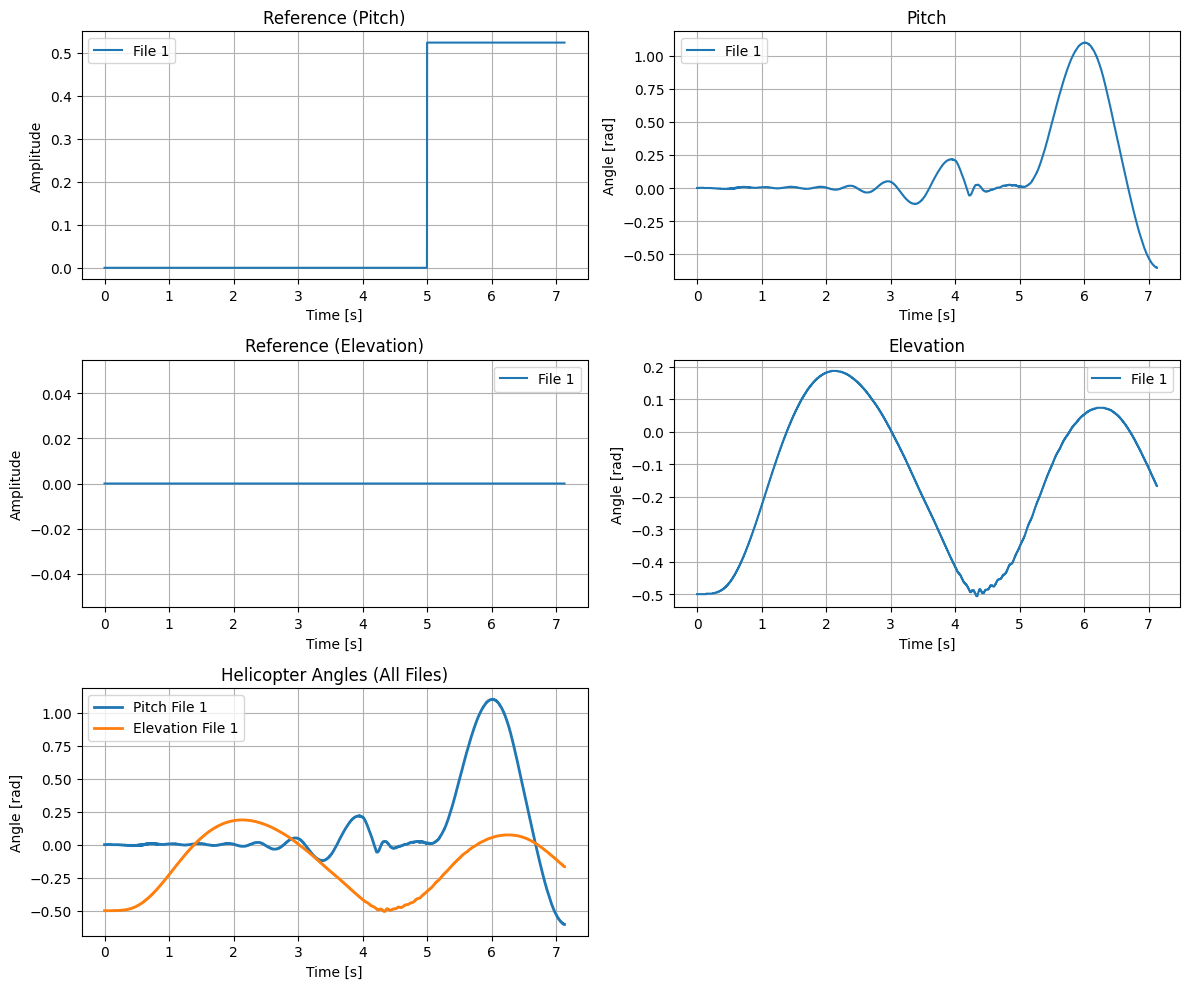

In [7]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# List of your .mat files
FILE_NAMES = [
    'minus2minus2.mat',
    # 'minus2minus5.mat',
    # 'minus3plusminus1i.mat',
    # 'minus5minus5.mat'
]

# Labels for the signals
labels = ['Time', 'Reference (Pitch)', 'Pitch', 'Reference (Elevation)', 'Elevation']

# Initialize a list to hold all data
all_data = []

# Load all files
for FILE_NAME in FILE_NAMES:
    data = scipy.io.loadmat(FILE_NAME)
    signal_data = data['ans']  # adjust key if different in other files
    all_data.append(signal_data)

# Prepare the subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Plot each signal
for i in range(1, 5):  # skip time (index 0)
    ax_idx = i - 1
    ax = axes[ax_idx // 2, ax_idx % 2]

    for j, signal_data in enumerate(all_data):
        time = signal_data[0, :]  # first row is time
        signal = signal_data[i, :]
        ax.plot(time, signal, label=f'File {j+1}')
    
    ax.set_title(labels[i])
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Angle [rad]' if i in [2, 4] else 'Amplitude')
    ax.grid(True)
    ax.legend()

# Combined plot of Pitch and Elevation in the last subplot
ax = axes[2, 0]
for j, signal_data in enumerate(all_data):
    time = signal_data[0, :]
    ax.plot(time, signal_data[2, :], label=f'Pitch File {j+1}', linewidth=2)
    ax.plot(time, signal_data[4, :], label=f'Elevation File {j+1}', linewidth=2)

ax.set_title('Helicopter Angles (All Files)')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Angle [rad]')
ax.legend()
ax.grid(True)

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


In [4]:
# Export the figure
import os

# Create figures directory if it doesn't exist
figures_dir = './figures'
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# Save the figure
fig.savefig(f'{figures_dir}/{FILE_NAME}.png', dpi=300, bbox_inches='tight')
print(f"Figure saved to {figures_dir}/{FILE_NAME}.png")

Figure saved to ./figures/minus1minus1.mat.png
